<a href="https://colab.research.google.com/github/maitysuvo19/Predict-Churning-customers/blob/main/credit_card_customers_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Definition
A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction.The data set is from https://leaps.analyttica.com/home .Now, this dataset consists of 10,000 customers mentioning their age, salary, marital_status, credit card limit, credit card category, etc. There are nearly 18 features.

We have only 16.07% of customers who have churned. Thus, it's a bit difficult to train our model to predict churning customers.

**Different Columns**


*   CLIENTNUM:Unique identifier for the customer holding the account
*   Attrition_Flag:Internal event (customer activity) variable - if the account is closed then 1 else 0

*   Customer_Age:Demographic variable - Customer's Age in Years
*   Gender:Demographic variable - M=Male, F=Female


*   Dependent_count:Demographic variable - Number of dependents
*   Education_Level:Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)


*   Marital_Status:Demographic variable - Married, Single, Divorced, Unknown
*   Income_Category:Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > $120K, Unknown)


*   Card_Category:Product Variable - Type of Card (Blue, Silver, Gold, Platinum)
*   Months_on_book:Period of relationship with bank


*   Total_Relationship_Count:Total no. of products held by the customer
*   Months_Inactive_12_mon:No. of months inactive in the last 12 months


*   Contacts_Count_12_mon:No. of Contacts in the last 12 months
*   Credit_Limit:Credit Limit on the Credit Card


*   Total_Revolving_Bal:Total Revolving Balance on the Credit Card
*   Avg_Open_To_Buy:Open to Buy Credit Line (Average of last 12 months)


*   Total_Amt_Chng_Q4_Q1:Change in Transaction Amount (Q4 over Q1)
*   Total_Trans_Amt:Total Transaction Amount (Last 12 months)


*   Total_Trans_Ct:Total Transaction Count (Last 12 months)
*   Total_Ct_Chng_Q4_Q1:Change in Transaction Count (Q4 over Q1)


*   Avg_Utilization_Ratio:Average Card Utilization Ratio
*   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1:Naive Bayes


*   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2:Naive Bayes
   

































# What will you find here

* Exploring & Visualising the data
* Transform the data for building better models
* Comparing the results and easily to choose the best model
* Trying Dimension Reduction, Scaling
* & more...

In [5]:
# Importing neccesary packages

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
plt.style.use('ggplot') # default plot style.

from scipy import stats
from scipy.stats import norm


from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 

import math
import warnings
warnings.filterwarnings('ignore')

# What do we have?, let's see

So.. we have only one dataset which in total 10127 observations 21 features. Our target column is Attrition_Flag(binary) and we will try to predict it. Dataset is not include any missing values(NaN/Null/NotANumber), it's a good new. We see that the dataset consists mostly of numerical data.

In [6]:
full_df = pd.read_csv('/content/BankChurners.csv')

display(full_df.shape)
# display 5 sample randomly
full_df.sample(5)

(10127, 23)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
2182,711574008,Existing Customer,32,M,3,College,Single,$80K - $120K,Blue,21,4,3,5,21390.0,0,21390.0,0.946,2477,59,0.341,0.000,0.000901,0.999100
1691,717013383,Existing Customer,52,M,2,High School,Married,$80K - $120K,Blue,43,4,3,4,31258.0,1518,29740.0,0.917,2866,53,0.893,0.049,0.000502,0.999500
7126,788835408,Attrited Customer,49,F,3,Unknown,Married,Less than $40K,Blue,33,6,3,3,2910.0,0,2910.0,0.789,2648,41,0.464,0.000,0.997110,0.002889
9862,709385133,Existing Customer,42,F,2,Doctorate,Married,Unknown,Blue,30,4,3,5,14828.0,1513,13315.0,0.748,15572,113,0.614,0.102,0.001291,0.998710
4701,824140908,Attrited Customer,52,M,3,Uneducated,Single,$120K +,Blue,48,5,3,4,20974.0,0,20974.0,0.000,1246,27,0.000,0.000,0.998190,0.001812


In [7]:
# We don't need the unique ids'
full_df.drop('CLIENTNUM', axis=1, inplace=True)

full_df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'], 
          inplace=True, axis=1)
full_df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], 
          inplace=True, axis=1)

display(full_df.shape)

(10127, 20)

In [8]:
# Checking features and target columns
display(full_df.columns)
# Checking dtypes
display(full_df.info())
# Checking numeric values stats
display(full_df.describe())

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

None

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


# Exploring the Data

## Categorical Features

* **Attrition_Flag** (1: Existing Customer, 0: Attrited Customer): The Customer leave or not
* **Gender** (1: Male, 0: Female)
* **Education_Level** (Graduate , High School, Unknown, Uneducated, College, Post-Graduate, Doctorate)
* **Marital_Status** (Married, Single, Unknown, Divorced)
* **Income_Category** (Less than 40K, 40K - 60K, 80K - 120K, 60K - 80K, Unknown, 120K +) in dollar
* **Card_Category** (Blue, Silver, Gold, Platinum)

In [9]:
cats = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

def pltCountplot(cats):
    
    fig, axis = plt.subplots(len(cats) // 3,3, figsize=(20,12))  

    index = 0
    for i in range(len(cats) // 3):
        for j in range(3):
            
            ax = sns.countplot(cats[index], data=full_df, ax=axis[i][j])
            
            if cats[index] in ['Education_Level', 'Income_Category']:
                for item in ax.get_xticklabels():
                    item.set_rotation(15)
                
            for p in ax.patches:
                height = p.get_height()
                ax.text(p.get_x()+p.get_width()/2.,
                        height + 3,
                        '{:1.2f}%'.format(height/len(full_df)*100),
                        ha="center") 
            index += 1

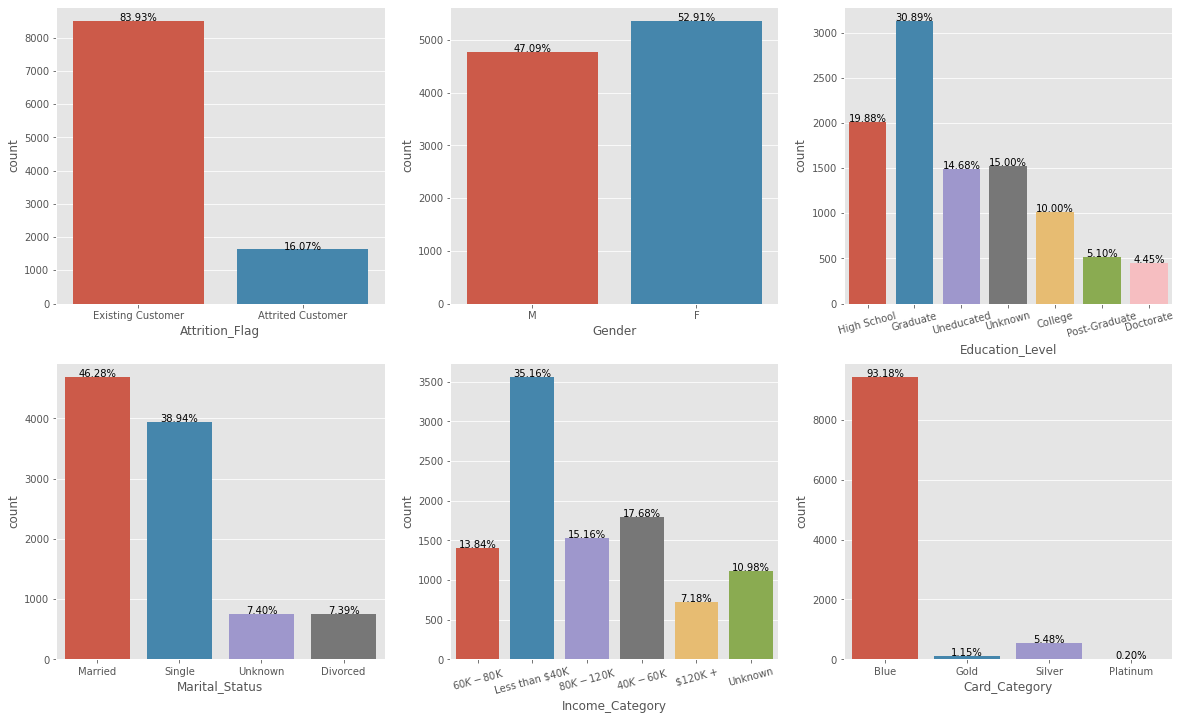

In [10]:
pltCountplot(cats)

### Observations

* We can see that the dataset is not equally distribute according to Attrition_Flag. We have samples which are mostly Existing.
* We can say that if education level is improved, using the credit card is decresing.
* Generally people use blue card, it's must be correlated with income.

In [11]:
def pltCountplotHueTarget(cats, target):
    
    fig, axis = plt.subplots(len(cats) // 3,3, figsize=(20,12))  

    index = 0
    for i in range(len(cats) // 3):
        for j in range(3):
            
            ax = sns.countplot(cats[index], data=full_df, hue=target, ax=axis[i][j])
            
            ax.legend(title='Customer exit?',
                      loc='upper right',
                      labels=['Yes', 'No'])
            
            if cats[index] in ['Education_Level', 'Income_Category']:
                for item in ax.get_xticklabels():
                    item.set_rotation(15)
                
            for p in ax.patches:
                height = p.get_height()
                ax.text(p.get_x()+p.get_width()/2.,
                        height + 3,
                        '{:1.2f}%'.format(height/len(full_df)*100),
                        ha="center") 
            index += 1

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


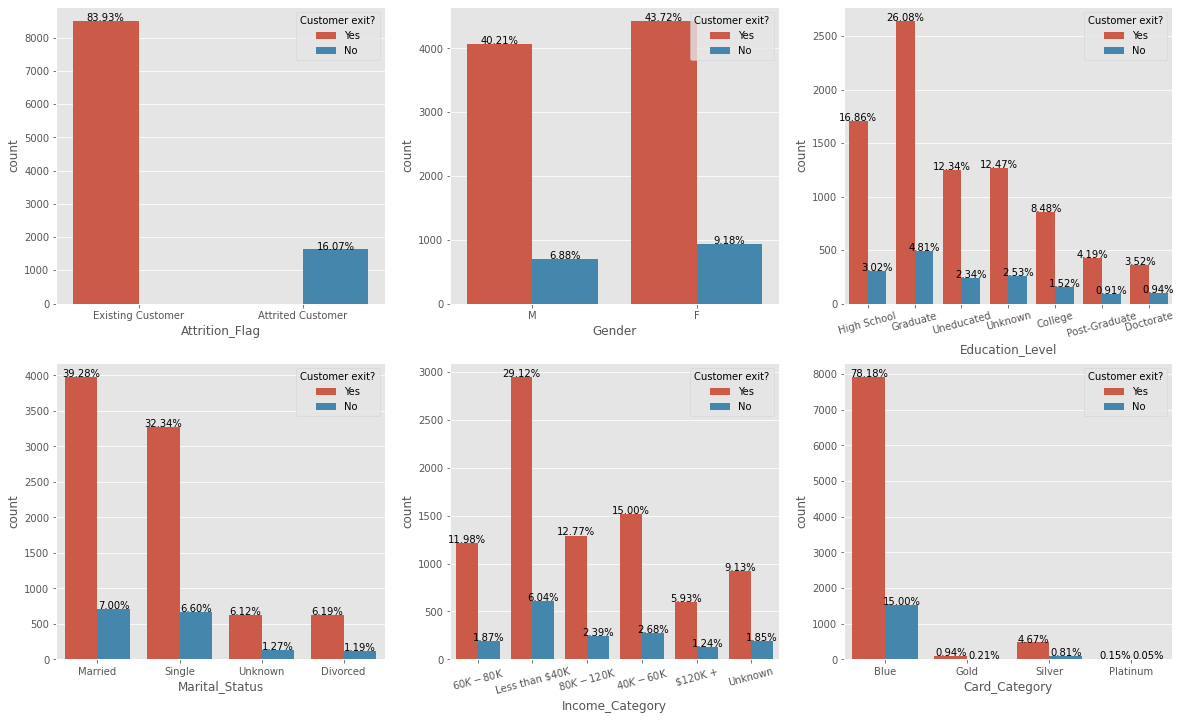

In [12]:
pltCountplotHueTarget(cats, 'Attrition_Flag')

## Numerical Features

* **Customer_Age**: Customer's Age in Years
* **Dependent_count:** Number of dependents
* **Months_on_book:** Period of relationship with bank
* **Total_Relationship_Count:** Total no. of products held by the customer
* **Months_Inactive_12_mon:** No. of months inactive in the last 12 months
* **Contacts_Count_12_mon:** No. of Contacts in the last 12 months
* **Credit_Limit:** Credit Limit on the Credit Card
* **Total_Revolving_Bal:** Total Revolving Balance on the Credit Card
* **Avg_Open_To_Buy:** Open to Buy Credit Line (Average of last 12 months)
* **Total_Amt_Chng_Q4_Q1:** Change in Transaction Amount (Q4 over Q1)
* **Total_Trans_Amt:** Total Transaction Amount (Last 12 months)
* **Total_Trans_Ct:** Total Transaction Count (Last 12 months)
* **Total_Ct_Chng_Q4_Q1:** Change in Transaction Count (Q4 over Q1)
* **Avg_Utilization_Ratio:** Average Card Utilization Ratio

In [13]:
numeric_columns = ['Customer_Age','Credit_Limit','Months_on_book','Avg_Utilization_Ratio','Avg_Open_To_Buy','Total_Trans_Amt','Dependent_count',
                  'Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon','Total_Revolving_Bal',
                  'Total_Amt_Chng_Q4_Q1','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1']

some_columns = ['Customer_Age','Credit_Limit','Months_on_book','Avg_Utilization_Ratio','Avg_Open_To_Buy','Total_Trans_Amt']


def plotDistPlot(columns):
    fig, ax = plt.subplots(len(columns)//3, 3,figsize=(20, 12))
    
    index = 0
    for i in range(2):
        for j in range(3):
            sns.distplot(full_df.loc[:, columns[index]],
                         hist=True,
                         fit=norm,
                         kde=True,
                         ax=ax[i][j])
            ax[i][j].set_title(columns[index])
            ax[i][j].legend(labels=['Normal', 'Actual'])
            index += 1

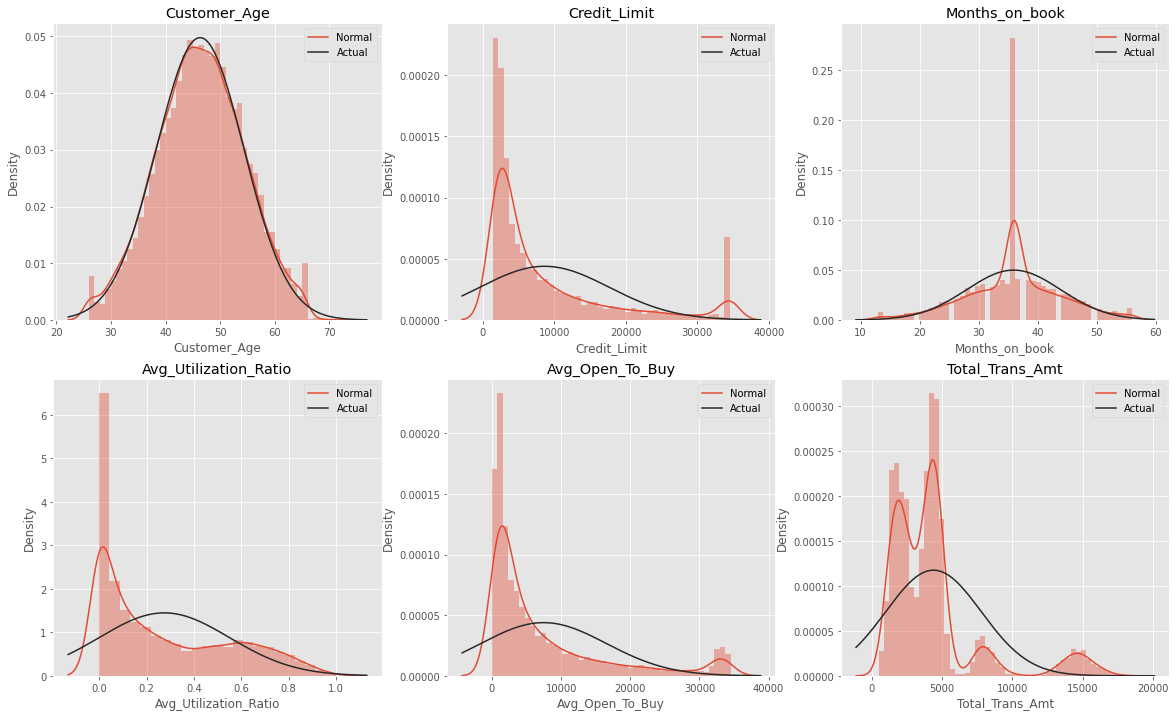

In [14]:
plotDistPlot(some_columns)

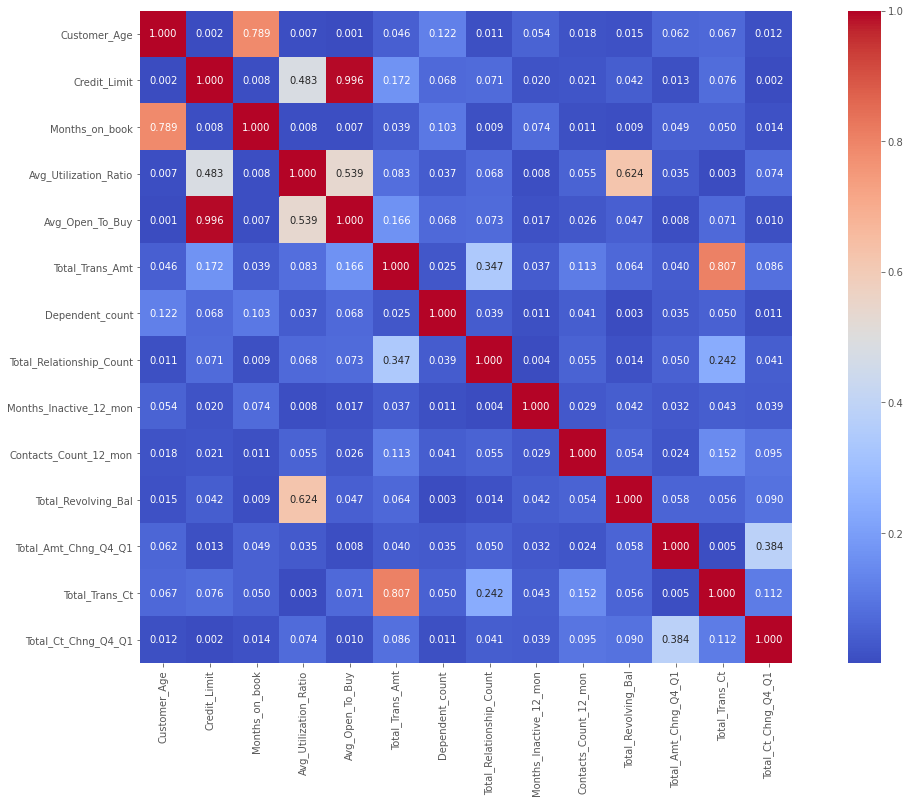

In [15]:
corr_data = full_df.loc[:, numeric_columns].corr()

plt.figure(figsize=(20,12))
sns.heatmap(corr_data.abs(), annot=True, fmt='.3f',cmap='coolwarm',square=True)
plt.show()

### NOTICE:  
Generally features have not strong correlation with each other. This is not mean they are not correleted. In corr matrix, we can see linearly corelated features. Maybe our features are correlated quadratic or n-degree polynomial. We can't see if features are correlated n-degree polynomial in the corr matrix.

## Missing Values

In the beginning of the notebook, i indicated that the dataset has not include missing values (If you check dataset page in kaggle, you see it). But we should check the dataset again, We should ensure. Heatmap is all dark. It's mean there is no missing data.

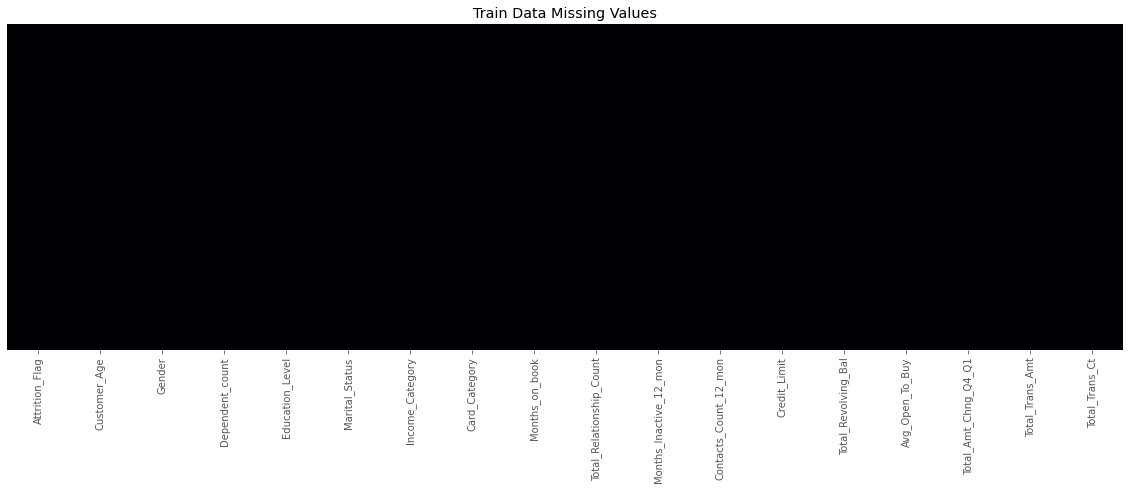

In [16]:
# detecting the missing data

fig, ax = plt.subplots(figsize=(20, 6))

ax.set_title('Train Data Missing Values')
plt.xticks(rotation=90)

sns.heatmap(full_df.iloc[:,:-2].isnull(),
            yticklabels=False,
            cbar=False,
            cmap='magma',
            ax=ax)

plt.show()

## Time to Feature Engineering!!

We will play with the data.

## Object, Category to Numeric, Encode

ML algorithms works on numeric values. That's why we should transform Object, Category, etc. values to numeric values.

### Binary Flags

In [17]:
updated_df = pd.DataFrame()

def tobinary():
    
    # full_df['Attrition_Flag'] = full_df.Attrition_Flag // same thing
    updated_df['Attrition'] = full_df.Attrition_Flag.map({'Existing Customer':1, 'Attrited Customer':0})
    
    updated_df['Gender'] = full_df.Gender.map({'M':1, 'F':0})

### String to integer

In [18]:
def stringtoint():
    income_data = full_df['Income_Category'].replace({'Unknown': 0 , 'Less than $40K':1, '$40K - $60K':2, 
                                                      '$80K - $120K':3, '$60K - $80K':4, '$120K +':5})
    
    education_data = full_df['Education_Level'].replace({'Unknown': 0, 'High School':1, 'Graduate':2, 'Uneducated':3,
                                                         'College':4,'Post-Graduate':5,'Doctorate':6})
    
    updated_df['Income_Category'] = income_data
    updated_df['Education_Level'] = education_data

### Dummies

In [19]:
def encode():
    global updated_df
    card_dummies = pd.get_dummies(full_df['Card_Category'], prefix='Card')
    marital_dummies = pd.get_dummies(full_df['Marital_Status'], prefix='Marital')
    updated_df = pd.concat([updated_df, marital_dummies, card_dummies], axis=1)

In [20]:
def concat_with_numerics():
    global updated_df
    updated_df = pd.concat([updated_df, full_df.loc[:, numeric_columns]], axis=1)

In [21]:
tobinary()
stringtoint()
encode()
concat_with_numerics()

In [22]:
print('Data shapes """including target value"""')
print(f'Old shape : {full_df.shape}')
print(f'Updated shape : {updated_df.shape}')

Data shapes """including target value"""
Old shape : (10127, 20)
Updated shape : (10127, 26)


## Look updated data

We're going to make sure the data is ready for modeling. Let's see the updated data with big picture.

In [23]:
updated_df.sample(5)

,Attrition,Gender,Income_Category,Education_Level,Marital_Divorced,Marital_Married,Marital_Single,Marital_Unknown,Card_Blue,Card_Gold,Card_Platinum,Card_Silver,Customer_Age,Credit_Limit,Months_on_book,Avg_Utilization_Ratio,Avg_Open_To_Buy,Total_Trans_Amt,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
9441,1,0,1,0,0,1,0,0,0,0,0,1,31,10353.0,36,0.147,8833.0,15028,1,2,3,1,1520,0.724,124,0.746
145,0,0,1,3,0,1,0,0,1,0,0,0,48,2732.0,38,0.000,2732.0,739,4,3,2,3,0,0.760,16,0.455
4402,0,0,1,3,0,0,1,0,1,0,0,0,51,1746.0,36,0.634,639.0,1907,2,2,3,3,1107,0.539,47,0.621
7238,1,0,1,4,0,0,1,0,1,0,0,0,43,2023.0,30,0.658,692.0,5098,3,3,3,2,1331,0.624,79,0.681
8647,1,1,5,2,0,1,0,0,1,0,0,0,41,5807.0,36,0.197,4664.0,8000,3,2,2,1,1143,0.785,96,0.412


In [24]:
updated_df.describe()

,Attrition,Gender,Income_Category,Education_Level,Marital_Divorced,Marital_Married,Marital_Single,Marital_Unknown,Card_Blue,Card_Gold,Card_Platinum,Card_Silver,Customer_Age,Credit_Limit,Months_on_book,Avg_Utilization_Ratio,Avg_Open_To_Buy,Total_Trans_Amt,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,0.839340,0.470919,2.072578,2.179125,0.073862,0.462822,0.389355,0.073961,0.931767,0.011455,0.001975,0.054804,46.325960,8631.953698,35.928409,0.274894,7469.139637,4404.086304,2.346203,3.812580,2.341167,2.455317,1162.814061,0.759941,64.858695,0.712222
std,0.367235,0.499178,1.461929,1.576387,0.261559,0.498641,0.487628,0.261720,0.252159,0.106416,0.044398,0.227608,8.016814,9088.776650,7.986416,0.275691,9090.685324,3397.129254,1.298908,1.554408,1.010622,1.106225,814.987335,0.219207,23.472570,0.238086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,1438.300000,13.000000,0.000000,3.000000,510.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000
25%,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,41.000000,2555.000000,31.000000,0.023000,1324.500000,2155.500000,1.000000,3.000000,2.000000,2.000000,359.000000,0.631000,45.000000,0.582000
50%,1.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,46.000000,4549.000000,36.000000,0.176000,3474.000000,3899.000000,2.000000,4.000000,2.000000,2.000000,1276.000000,0.736000,67.000000,0.702000
75%,1.000000,1.000000,3.000000,3.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,52.000000,11067.500000,40.000000,0.503000,9859.000000,4741.000000,3.000000,5.000000,3.000000,3.000000,1784.000000,0.859000,81.000000,0.818000
max,1.000000,1.000000,5.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,73.000000,34516.000000,56.000000,0.999000,34516.000000,18484.000000,5.000000,6.000000,6.000000,6.000000,2517.000000,3.397000,139.000000,3.714000


In [25]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition                 10127 non-null  int64  
 1   Gender                    10127 non-null  int64  
 2   Income_Category           10127 non-null  int64  
 3   Education_Level           10127 non-null  int64  
 4   Marital_Divorced          10127 non-null  uint8  
 5   Marital_Married           10127 non-null  uint8  
 6   Marital_Single            10127 non-null  uint8  
 7   Marital_Unknown           10127 non-null  uint8  
 8   Card_Blue                 10127 non-null  uint8  
 9   Card_Gold                 10127 non-null  uint8  
 10  Card_Platinum             10127 non-null  uint8  
 11  Card_Silver               10127 non-null  uint8  
 12  Customer_Age              10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Months

# Modelling

In [26]:
# Importing packages for modelling.

import xgboost as xgb
import lightgbm as lgb

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate, learning_curve
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [27]:
def estimates(X_data, y_data, models, cv):
    
    train_acc_dict = dict()
    test_acc_dict = dict()
    time_dict = dict()
    
    for model in models:
        
        current_model_name = model.__class__.__name__
        
        cv_results = cross_validate(model, X_data, y_data, cv=cv,
                                    return_train_score=True, scoring='accuracy')
        
        train_acc_dict[current_model_name] = cv_results['train_score'].mean()
        test_acc_dict[current_model_name] = cv_results['test_score'].mean()
        time_dict[current_model_name] = cv_results['fit_time'].mean()
        
    return train_acc_dict, test_acc_dict, time_dict

In [28]:
m_logreg = LogisticRegression()

m_gbc = GradientBoostingClassifier(random_state=14)

m_rfc = RandomForestClassifier(criterion='gini', n_estimators=999,
                            max_depth=4, random_state=14)

m_lgb = lgb.LGBMClassifier(num_iterations=550, learning_rate=0.01055,
                        max_depth=3, random_state=14)

m_xgb = xgb.XGBClassifier(n_estimators=2250,
                       max_depth=2, random_state=14)

m_gnb = GaussianNB()

m_mlpc = MLPClassifier(random_state=14)

m_svc = SVC(probability=True)

In [29]:
cv = StratifiedKFold(11, shuffle=True, random_state=14)

models = [m_logreg, m_gbc, m_rfc, m_lgb, m_xgb, m_gnb, m_mlpc, m_svc]

X = updated_df.drop('Attrition', axis=1)
y = updated_df['Attrition']

print(X.shape)
print(y.shape)

train_acc_dict, test_acc_dict, time_dict = estimates(X, y, models, cv)

(10127, 25)
(10127,)


# Model results

In [30]:
# Training accuracy
for key, value in train_acc_dict.items():
    print('{} - {:.1f}%'.format(key, value*100))

LogisticRegression - 88.3%
GradientBoostingClassifier - 97.5%
RandomForestClassifier - 91.2%
LGBMClassifier - 96.4%
XGBClassifier - 99.9%
GaussianNB - 89.7%
MLPClassifier - 86.3%
SVC - 83.9%


In [31]:
# Test accuracy
for key, value in test_acc_dict.items():
    print('{} - {:.1f}%'.format(key, value*100))

LogisticRegression - 88.3%
GradientBoostingClassifier - 96.6%
RandomForestClassifier - 91.0%
LGBMClassifier - 95.8%
XGBClassifier - 97.3%
GaussianNB - 89.7%
MLPClassifier - 85.7%
SVC - 83.9%


In [32]:
def result_barplots(result_1, result_2, ylabel_1 = 'Score', ylabel_2 = 'Score'):
    
    current_df_1 = pd.DataFrame({'Model':list(result_1.keys()),ylabel_1:list(result_1.values())})
    current_df_2 = pd.DataFrame({'Model':list(result_1.keys()),ylabel_2:list(result_1.values())})
    
    current_df_1 = current_df_1.sort_values(by=ylabel_1, ascending=False)
    current_df_2 = current_df_2.sort_values(by=ylabel_2, ascending=False)
    
    fig, ax = plt.subplots(1,2,figsize=(18,9), constrained_layout=True)
    
    for i in range(2):
        for item in ax[i].get_xticklabels():
            item.set_rotation(45)
    
    sns.barplot('Model',ylabel_1,data=current_df_1,ax=ax[0])
    sns.barplot('Model',ylabel_2,data=current_df_2,ax=ax[1])

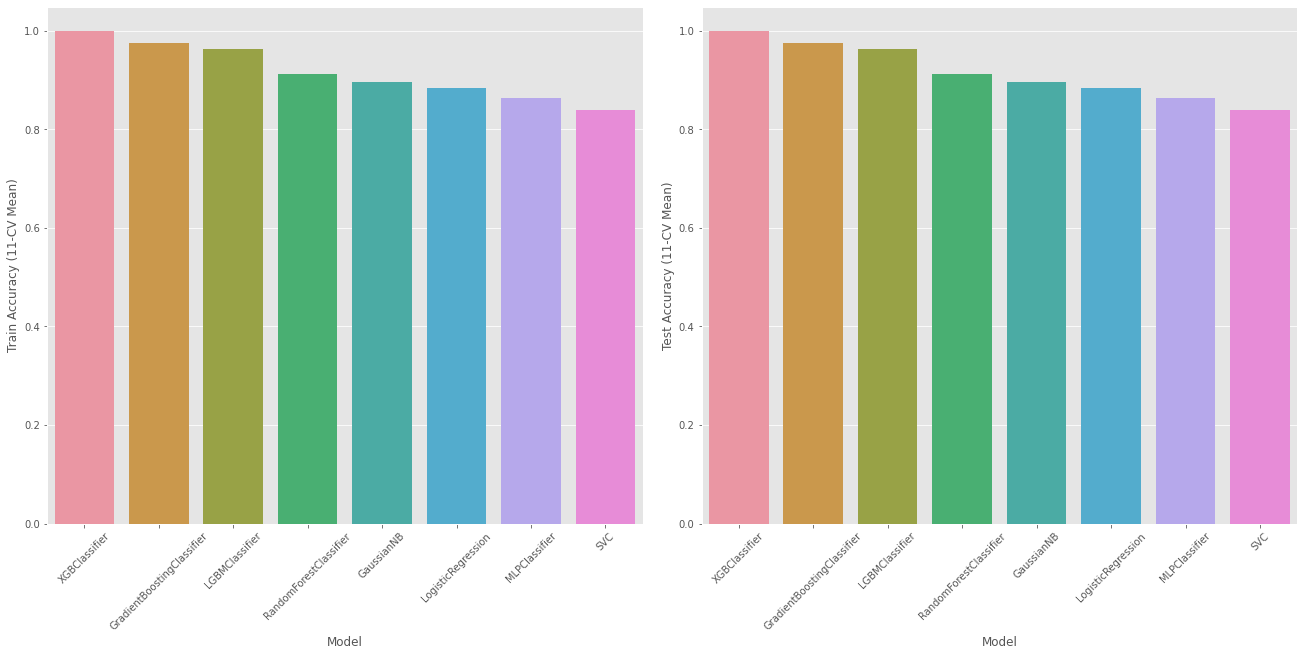

In [33]:
result_barplots(train_acc_dict, test_acc_dict, 'Train Accuracy (11-CV Mean)', 'Test Accuracy (11-CV Mean)')

In [34]:
def result_line(result, title = 'Fitting Time in seconds'):
    
    current_df = pd.DataFrame({'Model':list(result.keys()),'Score':list(result.values())})
    
    plt.figure(figsize=(15,10))
    plt.title(title)
    plt.xlabel('Model')
    plt.ylabel('Time in seconds')
    plt.plot(current_df['Model'], current_df['Score'], 'o-',
             color='r')
    plt.xticks(rotation=45)
    plt.show()

In [35]:
# Fitting time
for key, value in time_dict.items():
    print('{} - {:.1f} seconds'.format(key, value))

LogisticRegression - 0.2 seconds
GradientBoostingClassifier - 2.8 seconds
RandomForestClassifier - 6.9 seconds
LGBMClassifier - 0.7 seconds
XGBClassifier - 12.8 seconds
GaussianNB - 0.0 seconds
MLPClassifier - 10.3 seconds
SVC - 14.5 seconds


### **NOTICE:** Fitting time can be changed according to your process unit. TPU & GPU faster than CPU. So, Fitting time can be different.

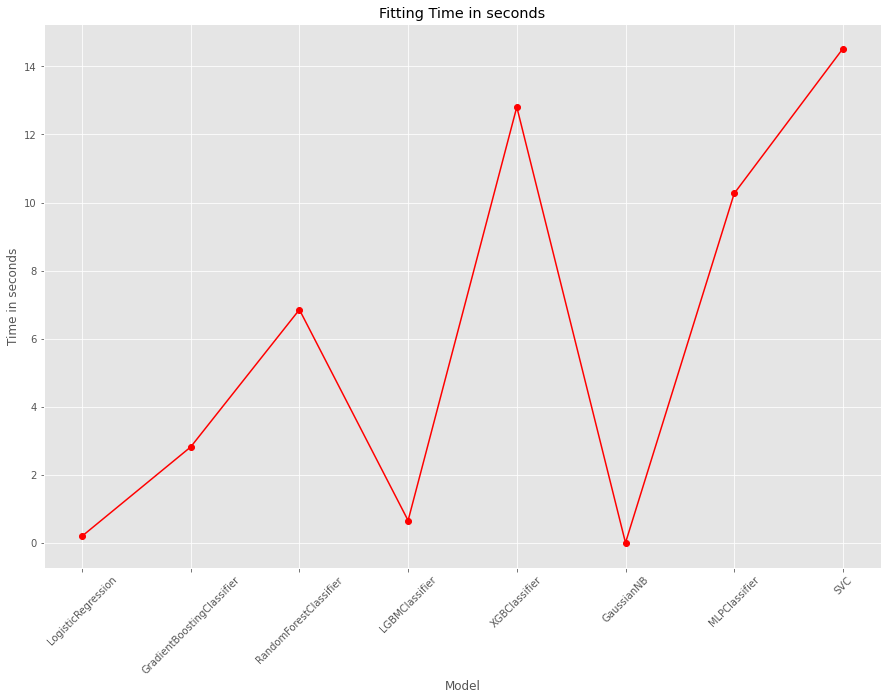

In [36]:
result_line(time_dict)

# Feature Importance

In [37]:
def plot_importance_features(models, X, y):
    
    fig, axes = plt.subplots(2, len(models) // 2, figsize=(23, 12))

    for ax, model in zip(axes.flatten(), models):
        try:
            model.fit(X, y)
            importance_features = pd.DataFrame(sorted(
                zip(model.feature_importances_, X.columns)),
                                       columns=['Value', 'Feature'])

            importance_features = importance_features.sort_values('Value', ascending=False)
            sns.barplot(y="Feature", x="Value", ax=ax,
                        data=importance_features)
            current_model_name = model.__class__.__name__
            ax.set(title=f'{current_model_name} Feature Importances')
            ax.xaxis.set_major_locator(MaxNLocator(nbins=11))
        except:
            pass

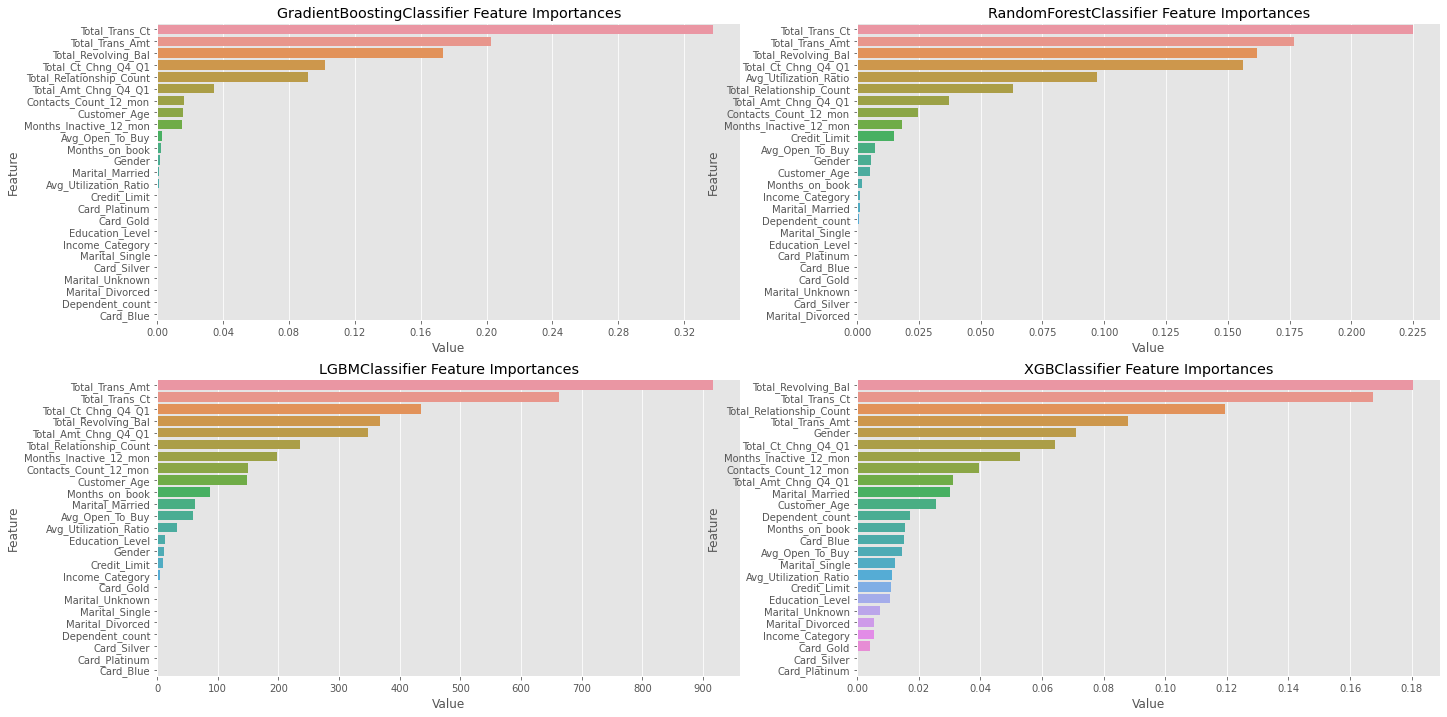

In [38]:
# some estimators don't have feature_importance that's why i choosed the estimators which are include feature_importance
plot_importance_features(models[1:5], X, y)

### Dimensional Reduction & Fit models again

Maybe some features are decreasing our models' accuracy. We try to reduce dimension then check accuracy again. Also, we try to improve models' accuracy using StandartScaler

In [39]:
# creates pipeline
my_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('reducer', PCA(n_components=2)),
])

X_red = my_pipe.fit_transform(X)

**Fit again**

In [40]:
train_acc_dict_red, test_acc_dict_red, time_dict_red = estimates(X_red, y, models, cv)

### Print & Plot the models' accuracy again.

In [41]:
# Training accuracy
for key, value in train_acc_dict_red.items():
    print('{} - {:.1f}%'.format(key, value*100))

LogisticRegression - 83.9%
GradientBoostingClassifier - 84.8%
RandomForestClassifier - 83.9%
LGBMClassifier - 84.1%
XGBClassifier - 86.8%
GaussianNB - 83.9%
MLPClassifier - 83.9%
SVC - 83.9%


In [42]:
# Test accuracy
for key, value in test_acc_dict_red.items():
    print('{} - {:.1f}%'.format(key, value*100))

LogisticRegression - 83.9%
GradientBoostingClassifier - 84.0%
RandomForestClassifier - 83.9%
LGBMClassifier - 84.0%
XGBClassifier - 83.3%
GaussianNB - 83.9%
MLPClassifier - 83.9%
SVC - 83.9%


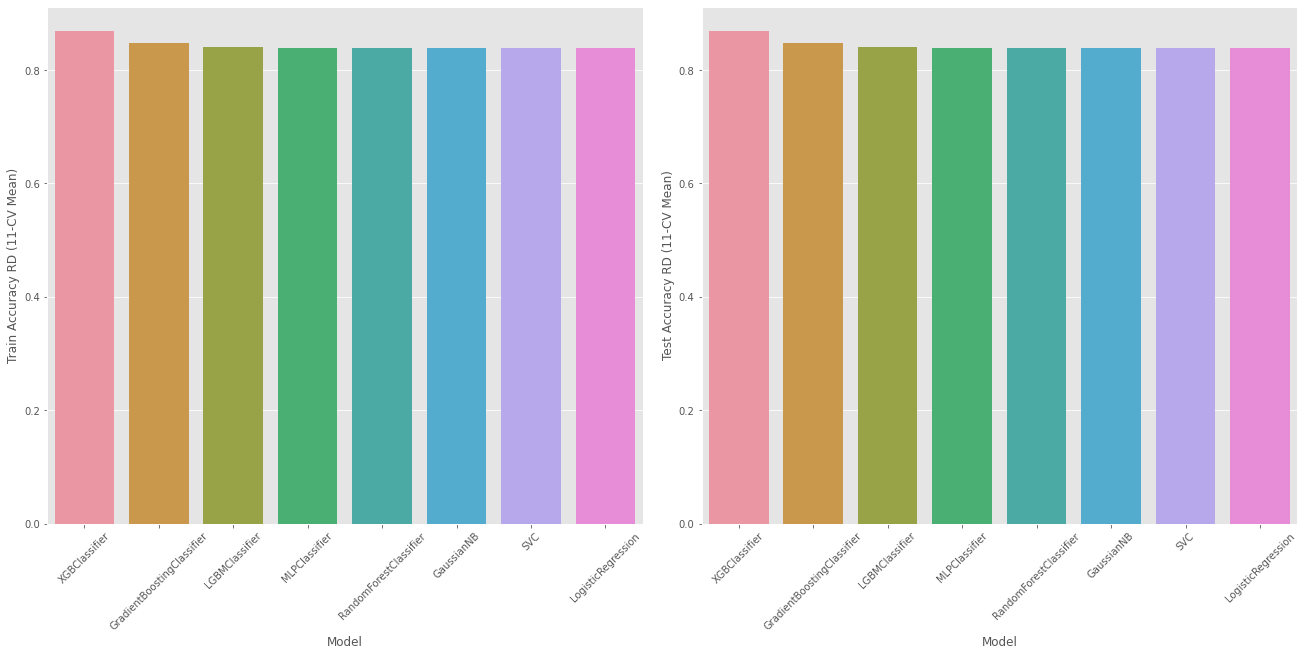

In [43]:
# plot bar plot
result_barplots(train_acc_dict_red, test_acc_dict_red, 'Train Accuracy RD (11-CV Mean)', 'Test Accuracy RD (11-CV Mean)')

In [44]:
# Fitting time
for key, value in time_dict.items():
    print('{} - {:.1f} seconds'.format(key, value))

LogisticRegression - 0.2 seconds
GradientBoostingClassifier - 2.8 seconds
RandomForestClassifier - 6.9 seconds
LGBMClassifier - 0.7 seconds
XGBClassifier - 12.8 seconds
GaussianNB - 0.0 seconds
MLPClassifier - 10.3 seconds
SVC - 14.5 seconds


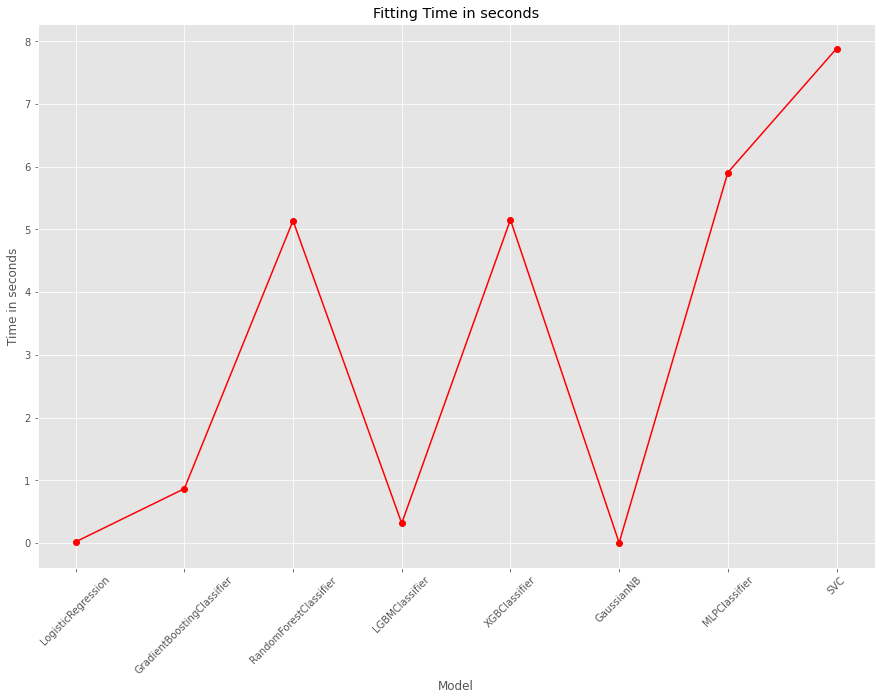

In [45]:
# plot line
result_line(time_dict_red)